# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [11]:
import numpy as np
a = np.array([[1,2,3],[2,3,1]])
b = np.array([-1,4,3])
c = a @ b
c

array([16, 13])

La figura precedente muestra un filtro *forward perdictor* con una estructura FIR, conformado por los taps de ponderación *$\hat{w}_1, \hat{w}_2,...,\hat{w}_{M-1}, \hat{w}_M$* y los taps de entrada *$u_{(i-1)}, u_{(i-2)},...,u_{(i-M)}$*, respectivamente.

El valor predecido $\hat{u}_{(i|u_{n-1})}$ se define según la ecuación:

$$\hat{u}_{(i|u_{i-1})} = \sum_{k=1}^{M} \hat{w}_k.u_{(i-k)}$$


Como la idea del filtro es predecir el valor siguiente de la señal *$u(i)$*, la respuesta deseada es:

$$d(i) = u(i)$$


y, por lo tanto, el error de la predicción viene dado por la diferencia entre el tap de entrada *$u(i)$* y el valor predecido $\hat{u}_{(i|u_{n-1})}$:

$$e_M(i) = u(i) - \hat{u}_{(i|u_{n-1})}$$

donde el subindice $M$ indica el orden del predictor, definido como la cantidad de taps que debe almacenar el filtro para realizar la predicción.

Para resolver las ecuaciones de *Wiener-Hops* (vistas en clase) para el vector de taps $\hat{w}$, se requiere conocer dos cantidades:

1. La matriz de $M$ por $M$ de correlación para las entradas $u_{(i-1)}, u_{(i-2)},..., u_{i-M}$.

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$.


En base a la formulación matricial vista en clase:

$$\phi\hat{w}= z$$

donde 

* $\phi$ es la matriz de $M$ por $M$ de corerlación de los taps de entrada.

* $z$ es el vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$.

* $\hat{w}$ es el vector de taps del filtro.

Operando sobre la ecuación precedente, se obtiene que

$$\hat{w}= \phi^{-1}z$$

#### 1. Matriz de $M$ por $M$ de correlación los taps de entrada:

Viene dada por la expresión:

$$\Phi  = A^H A$$

donde

$$
A^{H}=
\begin{equation}
    \begin{bmatrix}
        u(M) & u(M+1) & ... & u(N-1)
    \end{bmatrix}
\end{equation}
$$

$$
A^{H}=
\begin{equation}
    \begin{bmatrix}
        u(M) & u(M+1) & ... & u(N-1) \\
        .    & .      & .   & .      \\
        .    & .      & .   & .      \\
        .    & .      & .   & .      \\
        u(1) & u(2)   & ... & u(N-M) 
    \end{bmatrix}
\end{equation}
$$

con $i = M+1, ... , N$

#### 2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$: 

Viene dado por la expresión:

$$z = A^H d$$

donde

$$
d^{H}=
\begin{equation}
    \begin{bmatrix}
        u(M+1) & u(M+2) & ... & u(N)
    \end{bmatrix}
\end{equation}
$$

con $i = M+1, ... , N$

#### 3. El valor mínimo de $e_f$

Viene dado por la expresión:

$$min(e_f) = d^H d  -  d^H A (A^H A)^{-1}  A^H d$$

#### 4. El vector de taps *${\hat{w}}$*

Viene dado por la expresión:

$$\hat{w} = (A^H A)^{-1} A^Hd $$

#### 5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

In [2]:
#%%  Inicialización

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.linalg import inv

In [3]:
#%% Funciones de calculo
def calculate_forwardAH(signal, M, N):
    
    """ 
    brief:  Calculo de la matriz A Hermitica según las ecuaciones de 
            Wiener-Hopf para el filtro forward predictor
    
    signal: taps de entrada del filtro
    M:      orden del filtro
    N:      cantidad de taps a procesar
    
    como resultado la función devuelve:
    
    AH:     Matriz A hermitica de correlación de los taps de entrada
    """ 
    
    # comienzo de la función
    
    AH = np.zeros((M, (N - M)))
    
    # Ejemplo: Si N = 6 y M = 4, AH es de 4x2 porque
    #          i va de M + 1 a N
    
    # Itero sobre las columnas
    for i in np.arange(N - M):
        # De [M..1], [M + 1..2], .., [N-1..N-M]
        AH[:, i] = signal[np.arange(M + i, i, -1)]

    # fin de la función
    
    return AH

def calculate_forwardW(AH, d):
    
    """ 
    brief:  Calculo de los coeficientes w del filtro forward predictor 
            según la ecuaciones de Wiener-Hopf
    
    AH:     matriz A hermitica
    d:      señal deseada
    
    como resultado la función devuelve:
    
    w:      coeficientes del filtro forward predictor
    """ 
    
    # comienzo de la función
    
    PHI = AH@AH.transpose()
    z   = AH@d
    w   = inv(PHI)@z
    
    # fin de la función
    
    return w

def calculate_forwardEf(AH, d):
    
    """ 
    brief:  Calculo de la suma cuadrática de los errores de predicción
        
    AH:     matriz A hermitica
    d:      señal deseada
    
    como resultado la función devuelve:
    
    ef:     suma cuadrática de los errores de predicción
    """ 
    
    # comienzo de la función
    
    dH = d.transpose()
    A  = AH.transpose()
    ef = dH@d - dH@A@inv(AH@A)@AH@d
    
    # fin de la función

    return ef

In [31]:
#%%  Generación de señales de prueba

# Tomar N = 100 y M = 4
# 𝑢(𝑖)=𝑠𝑒𝑛(2𝜋𝜔0𝑖 + 𝜙0) + 0.02𝑛(𝑖), siendo 𝜔0=3, 𝜙0=𝜋/4 y 𝑛(𝑖) un ruido gaussiano de varianza unitaria. 

# Parametros de la señal de entrada

N  = 100          # Cantidad de taps de entrada
M  = 4            # Orden del filtro "forward predictor"

a0 = 1            # Amplitud de la senoidal de entrada
w0 = 3            # Frecuencia de la senoidal de entrada
p0 = np.pi/4      # Fase de la senoidal de entrada
mu = 0            # Media del ruido gaussiano de entrada
std = 0.02        # Varianza del ruido gaussiano de entrada

fs = 300          # Frecuencia de muestreo de la señal de entrada
ts = 1/fs         # Periodo de muestreo de la señal de entrada

tmax = 2          # Intervalo de muestreo de la señal de entrada

samples = tmax*fs # Cantidad de muestras de la señal de entrada   

# Generación del vector temporal
tt = np.linspace(0, tmax, samples).flatten()

# Generación de la señal deseada
d_signal = a0*np.sin(2*np.pi*w0*tt + p0)

# Generación de ruido gaussiano aditivo
noise_signal = np.random.normal(mu, std, np.size(d_signal))

# Generación de la señal de entrada
input_signal = d_signal + noise_signal

# Calculo de los coeficientes del filtro w donde 
# $$\hat{w} =(A^H A)^-1 A^H d$$ #

# Calculo de AH
AH = calculate_forwardAH(input_signal, M, N)

# Calculo de los coeficientes w
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
w = calculate_forwardW(AH, d_signal[M+1:N+1])

# Calculo del error cuadrático medio mínimo
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
ef = calculate_forwardEf(AH, d_signal[M+1:N+1])

# Calculo de la señal filtrada
output_signal = AH.transpose()@w

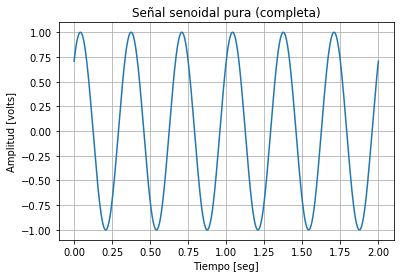

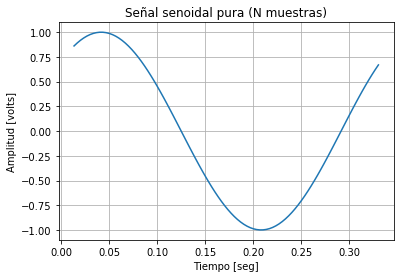

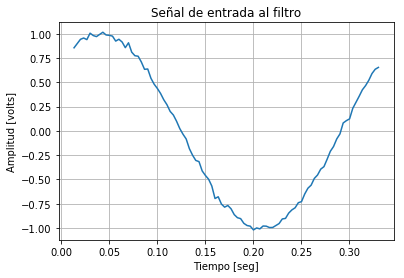

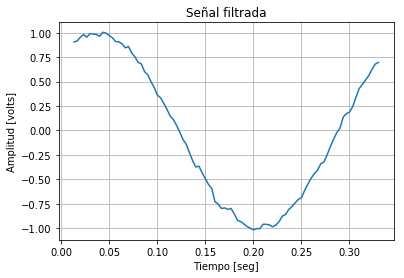

Error Cuadratico Medio minimo:0.04563246589431458


In [32]:
#%%  Presentación gráfica de los resultados

plt.close("all")

# Señal senoidal pura completa
plt.figure()
plt.plot(tt, d_signal)
plt.title('Señal senoidal pura (completa)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal senoidal pura primeras N muestras
plt.figure()
plt.plot(tt[M:N], d_signal[M:N])
plt.title('Señal senoidal pura (N muestras)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal de entrada: senoidal pura + ruido gaussiano
plt.figure()
plt.plot(tt[M:N], input_signal[M:N])
plt.title('Señal de entrada al filtro')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal filtrada
plt.figure()
plt.plot(tt[M:N], output_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

print('Error Cuadratico Medio minimo:{}'.format(ef))

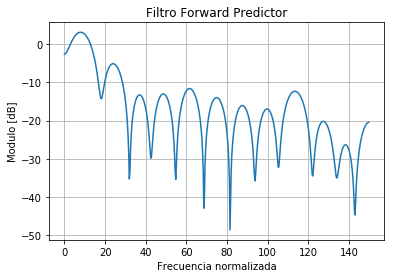

In [42]:
# Modulo del filtro

a = [1]                  # Por ser FIR
ww, hh = sig.freqz(w, a) # w coeficientes del filtro 

plt.figure()
plt.plot((fs * ww / (2 * np.pi)), 20 * np.log10(abs(hh)), label='Modulo')
plt.title('Filtro Forward Predictor')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.show()

### Se observa que el filtro elimina bastante ruido de la señal, siendo el error cuadratico medio de la estimación de la muestra u(N) de 0.045.

#### 6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### a. Realización 1: incremento los coeficientes del filtro a 24 con respecto a la realización inicial

In [33]:
#%%  Generación de señales de prueba

# Tomar N = 100 y M = 4
# 𝑢(𝑖)=𝑠𝑒𝑛(2𝜋𝜔0𝑖 + 𝜙0) + 0.02𝑛(𝑖), siendo 𝜔0=3, 𝜙0=𝜋/4 y 𝑛(𝑖) un ruido gaussiano de varianza unitaria. 

# Parametros de la señal de entrada

N  = 100          # Cantidad de taps de entrada
M  = 24           # Orden del filtro "forward predictor"

a0 = 1            # Amplitud de la senoidal de entrada
w0 = 3            # Frecuencia de la senoidal de entrada
p0 = np.pi/4      # Fase de la senoidal de entrada
mu = 0            # Media del ruido gaussiano de entrada
std = 0.02        # Varianza del ruido gaussiano de entrada

fs = 300          # Frecuencia de muestreo de la señal de entrada
ts = 1/fs         # Periodo de muestreo de la señal de entrada

tmax = 2          # Intervalo de muestreo de la señal de entrada

samples = tmax*fs # Cantidad de muestras de la señal de entrada   

# Generación del vector temporal
tt = np.linspace(0, tmax, samples).flatten()

# Generación de la señal deseada
d_signal = a0*np.sin(2*np.pi*w0*tt + p0)

# Generación de ruido gaussiano aditivo
noise_signal = np.random.normal(mu, std, np.size(d_signal))

# Generación de la señal de entrada
input_signal = d_signal + noise_signal

# Calculo de los coeficientes del filtro w donde 
# $$\hat{w} =(A^H A)^-1 A^H d$$ #

# Calculo de AH
AH = calculate_forwardAH(input_signal, M, N)

# Calculo de los coeficientes w
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
w = calculate_forwardW(AH, d_signal[M+1:N+1])

# Calculo del error cuadrático medio mínimo
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
ef = calculate_forwardEf(AH, d_signal[M+1:N+1])

# Calculo de la señal filtrada
output_signal = AH.transpose()@w

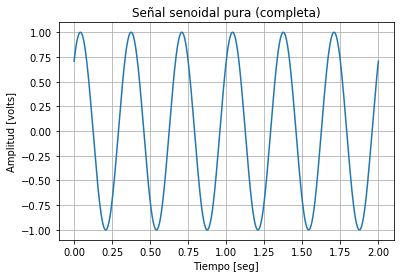

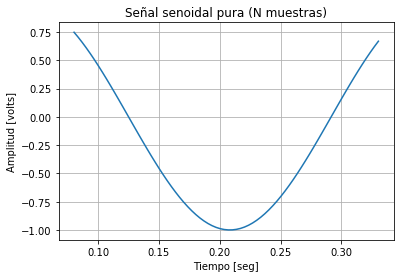

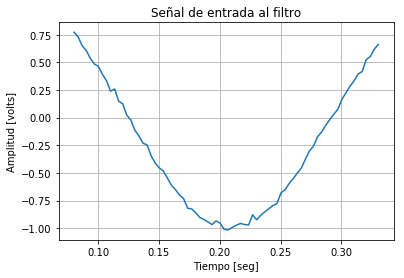

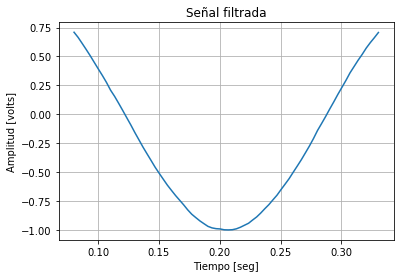

Error Cuadratico Medio minimo:0.0013733881527357994


In [34]:
#%%  Presentación gráfica de los resultados

plt.close("all")

# Señal senoidal pura completa
plt.figure()
plt.plot(tt, d_signal)
plt.title('Señal senoidal pura (completa)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal senoidal pura primeras N muestras
plt.figure()
plt.plot(tt[M:N], d_signal[M:N])
plt.title('Señal senoidal pura (N muestras)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal de entrada: senoidal pura + ruido gaussiano
plt.figure()
plt.plot(tt[M:N], input_signal[M:N])
plt.title('Señal de entrada al filtro')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal filtrada
plt.figure()
plt.plot(tt[M:N], output_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

print('Error Cuadratico Medio minimo:{}'.format(ef))

### Se observa que incrementar los coeficientes del filtro elimina todavía más ruido que la realización inicial, donde M = 4. El error cuadrático medio de la estimación de la muestra u(N) es mucho menor que la realización inicial. 

#### b. Realización 2: incremento la varianza del ruido gaussiano a 0.5 con respecto a la realización inicial

In [27]:
#%%  Generación de señales de prueba

# Tomar N = 100 y M = 4
# 𝑢(𝑖)=𝑠𝑒𝑛(2𝜋𝜔0𝑖 + 𝜙0) + 0.02𝑛(𝑖), siendo 𝜔0=3, 𝜙0=𝜋/4 y 𝑛(𝑖) un ruido gaussiano de varianza unitaria. 

# Parametros de la señal de entrada

N  = 100          # Cantidad de taps de entrada
M  = 4           # Orden del filtro "forward predictor"

a0 = 1            # Amplitud de la senoidal de entrada
w0 = 3            # Frecuencia de la senoidal de entrada
p0 = np.pi/4      # Fase de la senoidal de entrada
mu = 0            # Media del ruido gaussiano de entrada
std = 0.5        # Varianza del ruido gaussiano de entrada

fs = 300          # Frecuencia de muestreo de la señal de entrada
ts = 1/fs         # Periodo de muestreo de la señal de entrada

tmax = 2          # Intervalo de muestreo de la señal de entrada

samples = tmax*fs # Cantidad de muestras de la señal de entrada   

# Generación del vector temporal
tt = np.linspace(0, tmax, samples).flatten()

# Generación de la señal deseada
d_signal = a0*np.sin(2*np.pi*w0*tt + p0)

# Generación de ruido gaussiano aditivo
noise_signal = np.random.normal(mu, std, np.size(d_signal))

# Generación de la señal de entrada
input_signal = d_signal + noise_signal

# Calculo de los coeficientes del filtro w donde 
# $$\hat{w} =(A^H A)^-1 A^H d$$ #

# Calculo de AH
AH = calculate_forwardAH(input_signal, M, N)

# Calculo de los coeficientes w
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
w = calculate_forwardW(AH, d_signal[M+1:N+1])

# Calculo del error cuadrático medio mínimo
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
ef = calculate_forwardEf(AH, d_signal[M+1:N+1])

# Calculo de la señal filtrada
output_signal = AH.transpose()@w

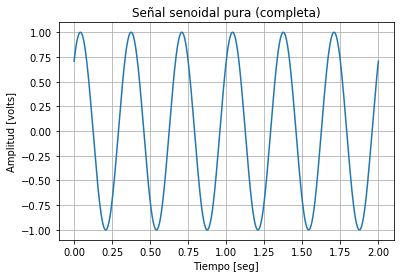

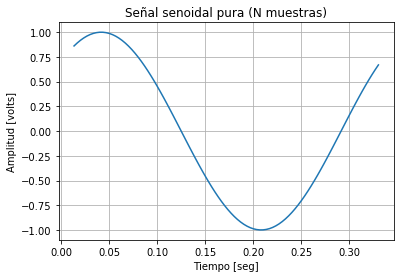

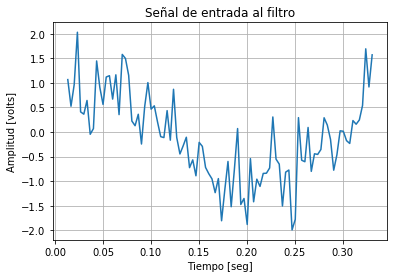

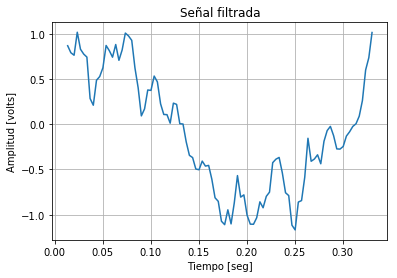

Error Cuadratico Medio minimo:6.735010222515271


In [28]:
#%%  Presentación gráfica de los resultados

plt.close("all")

# Señal senoidal pura completa
plt.figure()
plt.plot(tt, d_signal)
plt.title('Señal senoidal pura (completa)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal senoidal pura primeras N muestras
plt.figure()
plt.plot(tt[M:N], d_signal[M:N])
plt.title('Señal senoidal pura (N muestras)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal de entrada: senoidal pura + ruido gaussiano
plt.figure()
plt.plot(tt[M:N], input_signal[M:N])
plt.title('Señal de entrada al filtro')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal filtrada
plt.figure()
plt.plot(tt[M:N], output_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

print('Error Cuadratico Medio minimo:{}'.format(ef))

### Se observa que un orden M = 4 para el caso en que el ruido gaussiano es elevado, no permite eliminarlo correctamente; con lo que el error cuadratico medio de la estimación es también muy elevado.

#### c. Realización 3: incremento la varianza del ruido gaussiano a 0.5 y los coeficientes del filtro a 24 con respecto a la realización inicial

In [29]:
#%%  Generación de señales de prueba

# Tomar N = 100 y M = 4
# 𝑢(𝑖)=𝑠𝑒𝑛(2𝜋𝜔0𝑖 + 𝜙0) + 0.02𝑛(𝑖), siendo 𝜔0=3, 𝜙0=𝜋/4 y 𝑛(𝑖) un ruido gaussiano de varianza unitaria. 

# Parametros de la señal de entrada

N  = 100          # Cantidad de taps de entrada
M  = 24           # Orden del filtro "forward predictor"

a0 = 1            # Amplitud de la senoidal de entrada
w0 = 3            # Frecuencia de la senoidal de entrada
p0 = np.pi/4      # Fase de la senoidal de entrada
mu = 0            # Media del ruido gaussiano de entrada
std = 0.5        # Varianza del ruido gaussiano de entrada

fs = 300          # Frecuencia de muestreo de la señal de entrada
ts = 1/fs         # Periodo de muestreo de la señal de entrada

tmax = 2          # Intervalo de muestreo de la señal de entrada

samples = tmax*fs # Cantidad de muestras de la señal de entrada   

# Generación del vector temporal
tt = np.linspace(0, tmax, samples).flatten()

# Generación de la señal deseada
d_signal = a0*np.sin(2*np.pi*w0*tt + p0)

# Generación de ruido gaussiano aditivo
noise_signal = np.random.normal(mu, std, np.size(d_signal))

# Generación de la señal de entrada
input_signal = d_signal + noise_signal

# Calculo de los coeficientes del filtro w donde 
# $$\hat{w} =(A^H A)^-1 A^H d$$ #

# Calculo de AH
AH = calculate_forwardAH(input_signal, M, N)

# Calculo de los coeficientes w
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
w = calculate_forwardW(AH, d_signal[M+1:N+1])

# Calculo del error cuadrático medio mínimo
# d_signal va de M+1 hasta N, por lo que para que el punto N se incluya, 
# se usa [M+1:N+1]
ef = calculate_forwardEf(AH, d_signal[M+1:N+1])

# Calculo de la señal filtrada
output_signal = AH.transpose()@w

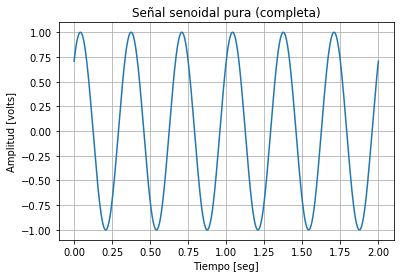

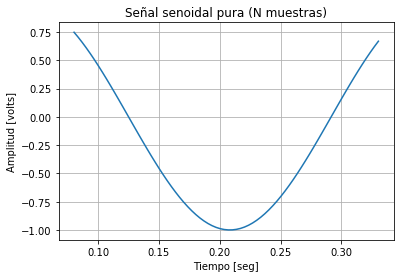

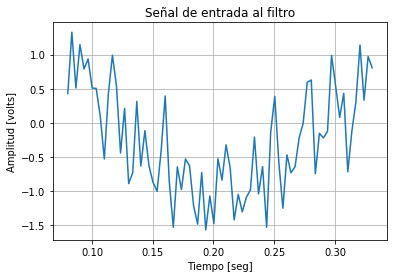

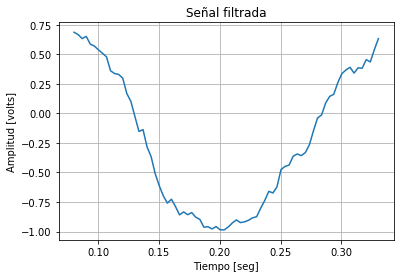

Error Cuadratico Medio minimo:0.8469816988757017


In [30]:
#%%  Presentación gráfica de los resultados

plt.close("all")

# Señal senoidal pura completa
plt.figure()
plt.plot(tt, d_signal)
plt.title('Señal senoidal pura (completa)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal senoidal pura primeras N muestras
plt.figure()
plt.plot(tt[M:N], d_signal[M:N])
plt.title('Señal senoidal pura (N muestras)')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal de entrada: senoidal pura + ruido gaussiano
plt.figure()
plt.plot(tt[M:N], input_signal[M:N])
plt.title('Señal de entrada al filtro')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

# Señal filtrada
plt.figure()
plt.plot(tt[M:N], output_signal)
plt.title('Señal filtrada')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Amplitud [volts]')
plt.grid()
plt.show()

print('Error Cuadratico Medio minimo:{}'.format(ef))

### Se observa que al aumentar el orden de M = 4 a M = 24, el ruido se reduce considerablemente, al igual que el error de la estimación de la muestra u(N).